# Machine Learning Module, Data Analysis 
----------------------------------------

- **Student Name:** `Franklin Arruda Cirino`
- **Student Number:** `2021368`


#### **Quick Notes:**  
 - Same as the first assignment, I am still catching up due to personal circumstances, having me to leave class a bit earlier than usual, relfecting on the learning and explation in class, however I have been reading the notes afterward, and this time I want to address the feedback directly and take to account the points made previously.
   
 - The feedback mentioned that I should explain the **WHY** behind my choices more clearly, so I am making an effort to do that here.  


### I had to install the tensorflow library for my model later on as it was complaining when hit run

In [52]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


## **Part 1 - Neural Network for Income Prediction**
### **1. Environment Setup**

First, I need to set up the environment by importing the necessary libraries for data manipulation and machine learning. This includes **pandas** and **numpy** for data handling, as well as **tensorflow** for building my neural network.


In [53]:
# Importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### **2. Loading and Inspecting the Dataset**
This step is inspired by the Titanic notebook used in class, but I adapted again for this project.

In [54]:
# Loading the dataset (BankRecords.csv)
df = pd.read_csv(r"C:\Users\STUDENT\Desktop\ML-CA2-50\BankRecords.csv")

#### Shape of the Dataset

In [55]:
# Checking shape of the dataset to understand the size
print("\nDataset Shape:")
print(df.shape) 


Dataset Shape:
(5000, 14)


#### Sample rows OF dataset and cheking import was successful 

In [56]:
# Displaying a sample of the dataset
print("\nSample of the Data:")
print(df.head())  


Sample of the Data:
   ID  Age  Experience(Years)  Income(Thousands's)  Sort Code  Family  \
0   1   25                  1                   49      91107       4   
1   2   45                 19                   34      90089       3   
2   3   39                 15                   11      94720       1   
3   4   35                  9                  100      94112       1   
4   5   35                  8                   45      91330       4   

   Credit Score Education  Mortgage(Thousands's) Personal Loan  \
0           1.6   Diploma                      0            No   
1           1.5   Diploma                      0            No   
2           1.0   Diploma                      0            No   
3           2.7    Degree                      0            No   
4           1.0    Degree                      0            No   

  Securities Account CD Account Online Banking CreditCard  
0                Yes         No             No         No  
1                Yes   

---

#### Checking Missing Values and Data Types, and memory usage:
This is an improvement from my first assignment, where I overlooked the impact of **NaNs** until later on the project.

Like, In my first assignment, I delayed checking for missing values and data types, which led to issues when training my models. This time, I am prioritizing this step to avoid similar mistakes because The feedback emphasized the importance of understanding the structure of the data early during the porject. Which would help me avoid the **"late detection"** problem I faced in my first assignment.

During the research on how to make the initial steps better I also bumped into a very interesting thing about memory usage whhich can help larger datasets not be interrupted during the model training, therefore, avoiding being out of memory errors. 

Checking data types and memory usage taken from pandas documentation: (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html)



##### Data Types and Memory Usage

In [57]:
# Checking data types and overall structure

print("\nData Types and Memory Usage:")
df_info = df.info()  # Checking data types and memory usage here...
print(df_info)


Data Types and Memory Usage:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     5000 non-null   int64  
 1   Age                    5000 non-null   int64  
 2   Experience(Years)      5000 non-null   int64  
 3   Income(Thousands's)    5000 non-null   int64  
 4   Sort Code              5000 non-null   int64  
 5   Family                 5000 non-null   int64  
 6   Credit Score           5000 non-null   float64
 7   Education              5000 non-null   object 
 8   Mortgage(Thousands's)  5000 non-null   int64  
 9   Personal Loan          5000 non-null   object 
 10  Securities Account     5000 non-null   object 
 11  CD Account             5000 non-null   object 
 12  Online Banking         5000 non-null   object 
 13  CreditCard             5000 non-null   object 
dtypes: float64(1), int64(7), o

##### Missing Values 

In [58]:
# Checking for missing values in each column this time
print("\nMissing Values:")
missing_values = df.isnull().sum()
print(missing_values)


Missing Values:
ID                       0
Age                      0
Experience(Years)        0
Income(Thousands's)      0
Sort Code                0
Family                   0
Credit Score             0
Education                0
Mortgage(Thousands's)    0
Personal Loan            0
Securities Account       0
CD Account               0
Online Banking           0
CreditCard               0
dtype: int64


### **3. Data Cleaning and Preprocessing**

To prepare the data for training, I dropped the **ID** column, converted the **Yes/No** columns to 1/0, and applied one-hot encoding to the **Education** column.

#### Dropping the 'ID' column since it's just an identifier
- I removed the 'ID' column because it’s just a number to identify each person. It doesn’t help the model learn anything, so I don’t need it.


In [59]:
print("\nDropping the 'ID' column...")
df.drop(columns=['ID'], inplace=True)


Dropping the 'ID' column...


#### Verifying the data after dropping 'ID'

In [60]:
print("\nData after dropping 'ID':")
print(df.head())


Data after dropping 'ID':
   Age  Experience(Years)  Income(Thousands's)  Sort Code  Family  \
0   25                  1                   49      91107       4   
1   45                 19                   34      90089       3   
2   39                 15                   11      94720       1   
3   35                  9                  100      94112       1   
4   35                  8                   45      91330       4   

   Credit Score Education  Mortgage(Thousands's) Personal Loan  \
0           1.6   Diploma                      0            No   
1           1.5   Diploma                      0            No   
2           1.0   Diploma                      0            No   
3           2.7    Degree                      0            No   
4           1.0    Degree                      0            No   

  Securities Account CD Account Online Banking CreditCard  
0                Yes         No             No         No  
1                Yes         No          

#### Binary encoding for 'Yes'/'No' columns

These columns have "Yes" and "No" answers. I changed them to 1 for Yes and 0 for No. This is because computers work better with numbers..haha

In [61]:
binary_cols = ['Personal Loan', 'Securities Account', 'CD Account', 'Online Banking', 'CreditCard']
df[binary_cols] = df[binary_cols].replace({'No': 0, 'Yes': 1}).astype(int)

C:\Users\STUDENT\AppData\Local\Temp\ipykernel_16104\115265984.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_cols] = df[binary_cols].replace({'No': 0, 'Yes': 1}).astype(int)


#### Verifying the binary encoding

I printed the first few rows to check if the Yes/No values changed correctly into 1 and 0.

In [62]:
print("\nSample of Binary Encoding:")
print(df[binary_cols].head())


Sample of Binary Encoding:
   Personal Loan  Securities Account  CD Account  Online Banking  CreditCard
0              0                   1           0               0           0
1              0                   1           0               0           0
2              0                   0           0               0           0
3              0                   0           0               0           0
4              0                   0           0               0           1


#### One-Hot Encoding for the 'Education' column
This is a nominal categorical feature, so one hot encoding might be appropriate here.

I checked what different types of education are in the data, and how many people are in each group.

In [63]:
print("\nUnique Values in 'Education':")
print(df['Education'].value_counts())

# I changed the 'Education' column into new columns with numbers. 
# Each new column is for one type of education. 
# I used drop_first=True so I don’t repeat the same info.
df = pd.get_dummies(df, columns=['Education'], drop_first=False)


Unique Values in 'Education':
Education
Diploma    2096
Masters    1501
Degree     1403
Name: count, dtype: int64


#### Converting the one-hot encoded columns to integers
This avoids any future issues with boolean data types.

In [64]:
education_cols = [col for col in df.columns if 'Education_' in col]
df[education_cols] = df[education_cols].astype(int)

#### Verifying the one-hot encoding , final check for the shape and Printing the columns before and after encoding for verification

In [65]:
# Verifying the one-hot encoding
print("\nData after One-Hot Encoding 'Education':")
print(df.head())


Data after One-Hot Encoding 'Education':
   Age  Experience(Years)  Income(Thousands's)  Sort Code  Family  \
0   25                  1                   49      91107       4   
1   45                 19                   34      90089       3   
2   39                 15                   11      94720       1   
3   35                  9                  100      94112       1   
4   35                  8                   45      91330       4   

   Credit Score  Mortgage(Thousands's)  Personal Loan  Securities Account  \
0           1.6                      0              0                   1   
1           1.5                      0              0                   1   
2           1.0                      0              0                   0   
3           2.7                      0              0                   0   
4           1.0                      0              0                   0   

   CD Account  Online Banking  CreditCard  Education_Degree  \
0           0    

In [66]:
# Printing all shape 
print("\nDataset Shape After Encoding and Cleaning:")
print(df.shape)


Dataset Shape After Encoding and Cleaning:
(5000, 15)


In [67]:
# Printing the columns 
print("\nColumns After One-Hot Encoding:")
print(df.columns)


Columns After One-Hot Encoding:
Index(['Age', 'Experience(Years)', 'Income(Thousands's)', 'Sort Code',
       'Family', 'Credit Score', 'Mortgage(Thousands's)', 'Personal Loan',
       'Securities Account', 'CD Account', 'Online Banking', 'CreditCard',
       'Education_Degree', 'Education_Diploma', 'Education_Masters'],
      dtype='object')


#### Here I check for missing values after cleaning it up, but aparrently nothing has changed much other than the ID

In [68]:
print("\nChecking for Missing Values After Cleanup:")
print(df.isnull().sum())


Checking for Missing Values After Cleanup:
Age                      0
Experience(Years)        0
Income(Thousands's)      0
Sort Code                0
Family                   0
Credit Score             0
Mortgage(Thousands's)    0
Personal Loan            0
Securities Account       0
CD Account               0
Online Banking           0
CreditCard               0
Education_Degree         0
Education_Diploma        0
Education_Masters        0
dtype: int64


#### Summury of Dta Cleanup and Encoding 

- First, they removed the 'ID' column because it's just a label and not useful for the analysis. Then, I changed some yes/no columns into 0 and 1 to make them easier for the computer to understand. After that, it showed a quick sample to check if that worked.

- After that, I looked at the 'Education' column and used one-hot encoding to turn it into multiple columns with numbers. I skipped the first category to avoid duplicate info.

- At the end, I printed out the shape of the data and the column names to see how everything changed after the cleaning and encoding.

### **4. Splitting the Data**

Now, I split the data into training and testing sets to avoid data leakage and ensure a fair model evaluation.

#### Creating and implementing 1 Regression algorithm and 1 Neural Network

- So, this step is about defining my target variable and splitting the data into training and testing set. That is an important part of the machine learning workflow because it sets the stage for the training and for my models. 

- Basically, I want my model to learn patterns from the training sets and then test it how well can generalize using the test set.

- If I don't split the data properly, my model might just memorize everything causing to 'overfitting' and fail when it sees new data. This step directly connects to the assignment requirement of using the "Income(Thousand)" column as the target for the Neural Network and Regressor comparison later.

In [69]:
# imports
from sklearn.model_selection import train_test_split

# Splitting the data into features (X) and target (y)
# X is everything except the target column, y is just the target column
X = df.drop(columns=["Income(Thousands's)"])  
y = df["Income(Thousands's)"]  

#### Doing the train-test split

- Using 80% of the data for training and 20% for testing as good practice, which is pretty standard
- why the 42? Well I asked this question in meet ups during the development of the final projetc, and I couldn't answer it.
- Now I understand that this is to ensures that every time you run the code, you get the same training and testing sets, which becomes ajoke among data scientists on the inteene

In [70]:
# Using 80% of the data for training and 20% for testing as good practice, which is pretty standard
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Displaying the Split size for each part

- Just Printing out the shapes to make sure everything looks good


In [71]:
# Printing them
print("\nTraining Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Target Shape:", y_train.shape)
print("Testing Target Shape:", y_test.shape)


Training Features Shape: (4000, 14)
Testing Features Shape: (1000, 14)
Training Target Shape: (4000,)
Testing Target Shape: (1000,)


#### Train-Test Split mini report
That means we have 4000 samples for training and 1000 samples for testing, which is 80% for training and 20% for testing, a pretty standard ratio for machine learning projects as per good practice.

The 14 features are what the model will use to learn all along, while the target (income) is the value we want it to predict usign the same data. Splitting the data this way helps us evaluate our model’s performance on data that isn't visible, preventing overfitting and possibly giving me a more realistic measure of how it will do in the real world just in case.

I also included the distribution plot for the income target to check if our training and test sets have similar distributions, which is important for a balanced learning process as follows:

----

## Just doing a quick Check on Income Distribution
Before jumping into model training, I plotted the training target (y_train) to get a sense of the income distribution.
That is is a quick way to spot if the data is skewed or has outliers, which can mess with the model's learning.

The plot uses 20 bins for a decent level of detail, with a bit of transparency (alpha=0.7) to keep it clean. This step is just to visualize the range of incomes we're trying to predict.

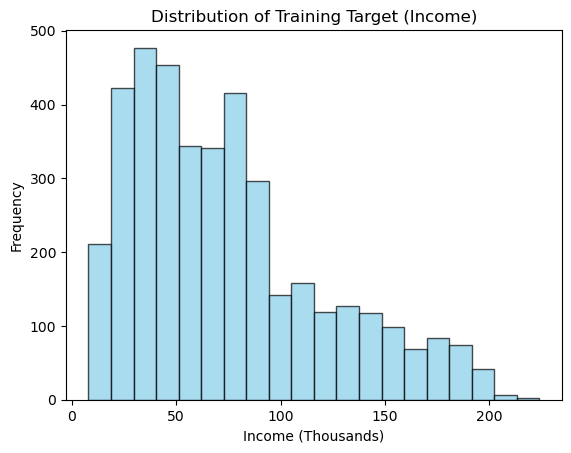

In [72]:
# The distribution of the target variable
import matplotlib.pyplot as plt
plt.hist(y_train, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
plt.title("Distribution of Training Target (Income)")
plt.xlabel("Income (Thousands)")
plt.ylabel("Frequency")
plt.show()

### **5. Building and Training the Neural Network**

#### Setting Up the Neural Network Model

- Here, I’m using Keras from TensorFlow to define a simple feedforward neural network.
- The network structure is loosely inspired by the notes wepracticed in class. And Although I could not attend the last class due to illness, Imade sure to do a research on this topic.

Which brings me to the basic idea of dense layers that can learn patterns in the data to predict customer income effectively. I took some inspiration from these references here and official Keras documentation, making sure I’m not over-complicating things right out of the gate...

- Keras Sequential Model Guide (Accessed 17/05/2025)

- Keras Sequential API (Accessed 17/05/2025)

Also, referenced in the reference part int he end.

#### **Clear any previous model state**

In [73]:
# Clear any previous model state
from tensorflow.keras import backend as K
K.clear_session()

#### Imports and library & Defining the Model for prediction

I built a Sequential neural network model with three hidden layers and dropout to reduce overfitting. I also set up early stopping to prevent the model from training too long.


In [74]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Defining the model
model = Sequential()

#### Input Layer: 
- The number of inputs matches the 14 features we prepared earlier as showed above.

In [75]:
# Input layer and first hidden layer of the model
model.add(Dense(units=64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))

C:\Users\STUDENT\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### Hidden Layers: 
-  I’m using multiple layers to capture complex relationships. 
- I kept the layer sizes in descending order (64 → 32 → 16) to gradually reduce the data, which can help the model learn more abstract features.

In [76]:
# Second hidden layer
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

# Third hidden layer
model.add(Dense(units=16, activation='relu'))
model.add(Dropout(0.3))

#### Output Layer: 
- Just one node because we’re predicting a single continuous value (income).

In [77]:
# Output layer (single node for regression)
model.add(Dense(units=1, activation='linear'))

#### Compiling model: 

- I compiled the model using the Adam optimizer because it adjusts the learning rate and works well for deep learning. For the loss, I picked Mean Squared Error since we’re predicting income. I also added Mean Absolute Error to easily see how far off the predictions are on average.

In [78]:
# Compiling the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

#### Model Summary
- Finally, I used model.summary() to quickly check the network’s structure. It’s a good habit from the Keras guide to make sure everything looks right before starting training.

In [79]:
# Model summary for a quick check
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,585 (14.00 KB)

 Trainable params: 3,585 (14.00 KB)

 Non-trainable params: 0 (0.00 B)

A quick overview about the modell I just defined. It’s a stack of Dense layers (64, 32, 16, and finally 1 unit), with Dropout layers in between to help prevent overfitting during the prediction. Each layer reduces the dimension a bit, and the final layer has one unit, which might works well for predicting a single continuous value since it is a regression task.

The model has provided with 3,585 total parametersthis includes all the weights and biases that’ll be learned during training later.

#### Model Training and Validation
Now that the model is defined, it’s time to actually train it. This is where the real learning happens. The model will go through the training data multiple times (epochs), adjusting its weights with each pass to minimize the error. This is called backpropagation.

#### Why This is Important:
- Learning from Data: This is the phase where the model truly learns the relationships in the data.

- Avoiding Overfitting: Using early stopping helps prevent the model from just memorizing the training data.

- Evaluating Performance: By validating the model on unseen data, we can check how well it generalizes.

#### Explanation of EarlyStopping in Keras
The EarlyStopping callback in Keras is used to halt training when a monitored metric (such as validation loss) stops improving. This technique helps prevent overfitting and reduces unnecessary computation.

In this part, EarlyStopping was configured to monitor validation loss and restore the best weights when performance stopped improving. For more details, you can refer to the following resources:

- A Simple Guide to Prevent Overfitting (Medium) (Accessed 17/05/2025)

- EarlyStopping Callback (Accessed 17/05/2025)

Also, referenced in the reference part int he end.

---


#### **Clear any previous model state (AGAIN)**

I do it here again to make sure that the state from previous run is gone...

In [80]:
# Clear any previous model state
from tensorflow.keras import backend as K
K.clear_session()

In [81]:
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# This callback here will stop the training if the validation loss stops improving for 5 consecutive epochs, 
# which is a good way to prevent overfitting for the model.
early_stopping = EarlyStopping(
    monitor = 'val_loss', 
    patience = 5,          
    restore_best_weights=True  
)

- This setup instructs the model to monitor the validation loss (val_loss) and stop training if it dont improve for 5 consecutive epochs (patience=5). -

- By setting restore_best_weights=True, the model is going to revert to the weights from the epoch with the best validation loss.


### Training the model Model Early Stopping using (Keras) too

- The model fitting section in your code is where the actual training happens.
  
- You used the fit() function from the Sequential model, which is a core part of the Keras API.

#### This approach is consistent with the Keras documentation:

I got this approach from the Keras documentation, which says that the fit() method is for training models over a fixed number of loops (epochs) through the data. It also mentions that this method is where you set important things like batch size and callbacks, like EarlyStopping to avoid overfitting for the model.

In [82]:
# Training the model
history = model.fit(
    X_train, y_train,
    validation_data = (X_test, y_test),
    epochs = 50,
    batch_size = 32,
    callbacks = [early_stopping],
    verbose = 1
)

Epoch 1/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 66778928.0000 - mae: 5363.7847 - val_loss: 43476.1680 - val_mae: 203.3000
Epoch 2/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3569632.0000 - mae: 1286.9781 - val_loss: 2655.6086 - val_mae: 37.8722
Epoch 3/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1341100.6250 - mae: 746.1458 - val_loss: 7486.4927 - val_mae: 73.2528
Epoch 4/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 560522.5000 - mae: 413.9468 - val_loss: 7486.4653 - val_mae: 73.2526
Epoch 5/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 319175.0312 - mae: 260.1487 - val_loss: 7486.1973 - val_mae: 73.2508
Epoch 6/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 312333.2188 - mae: 228.4280 - val_loss: 7485.8564 - val_mae: 73.2485
Epoch 7/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 189980.3750 - mae: 205.3212 - val_loss: 7485.2163 - val_mae: 73.2441


### Training History Plot

Plotting the training and validation loss over epochs is a very common practice to visualize the models performance and detect overfitting of this projetc, so I copied from ***stack Overflow*** and adapated to my own usage as follows.

Also, following the tutorial from ***Machice Learning Mastery*** WEBSITE. Which is an approach that is widely used and recommended in various tutorials and guides, such as the one by Jason Brownlee here.

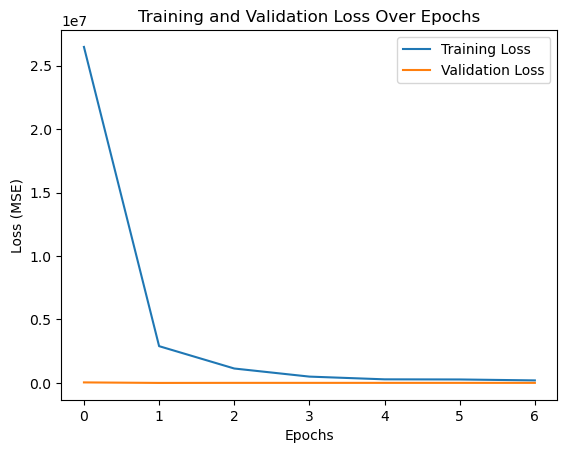

In [83]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Training and Validation Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.show()


#### Model training results and my Observations, as well as potential for improvements...

#### Here is how I understood the Parameters and how it impacted on the findings from the above results
##### X_train, y_train:
This is training data and labels of the model.

##### validation_data:
This test set is used for validating the model after each epoch.

##### epochs=100:
This is the maximum number of training cycles.

##### batch_size=32:
This is number of samples processed before the model updates for each time.

##### callbacks=
Here it stops the training if the validation loss stops improving for each cycle.

##### verbose=1:
It shows the detailed logs during training while runnning.

***( Undersding this part was crucial because it helped me to observe the findings and how to make improvements which brings me to the following observations during the training...)***


#### What I saw during training:
( When I first trained my neural network, I noticed a few things.)

- At the beginning, the loss and MAE were really high, but they went down very fast, which showed me that the model was starting to learn some patterns. That made me happy as it started to work out well...

- After a few more epochs, the validation loss started going up. This is probably overfitting, which means that the model was doing well on the training data but not on the validation data possibly.

- I read in the Keras training guide that this kind of thing can happen if the model is too big compared to the amount of data you would have for the model (Keras Documentation, checked on 17/05/2025).



#### Plot Plot Analysis:
The loss (MSE) on the vertical axis starts very low and gradually increases, which is a clear sign of overfitting of the model. The training loss decreases quickly as well, but the validation loss starts increasing after a few epochs all along, confirming what I saw in the training logs earlier.

This behavior matches what the Keras documentation talks about, where they mention that the risk of overfitting if the model that is too big compared to the data size, so they suggested using dropout layers or reducing the number of layers to balance this to improvements, which after reading it the (Keras Documentation, Accessed 17/05/2025). I decided to alter the Earlier for the ***Training Model***. 

***(Lastly, for the improvements I decided to put it all in one single cell for both parts: "The Model Improvements & Training Model" as shows bellow to prevent confusion since this is only imrpovements)***


#### Simple Model Improvements

- Based on the initial training observations, I made a few quick changes to reduce overfitting:

- Increased Dropout: To make the model less reliant on specific neurons.

- Reduced Neurons: Made the layers smaller to reduce model complexity.

- Added L2 Regularization: To prevent large weights, which can lead to overfitting. 

In [84]:
# Clear any previous model state
from tensorflow.keras import backend as K
K.clear_session()


In [85]:
from tensorflow.keras import regularizers

# REFACTORED model with these small improvements
improved_model = Sequential()

# Input layer and first hidden layer
improved_model.add(Dense(32, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=regularizers.l2(0.001)))
improved_model.add(Dropout(0.4))

# Second hidden layer
improved_model.add(Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
improved_model.add(Dropout(0.4))

# Output layer
improved_model.add(Dense(1, activation='linear'))

# Compile the model
improved_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Quick summary to check the changes
improved_model.summary()

C:\Users\STUDENT\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,025 (4.00 KB)

 Trainable params: 1,025 (4.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 300686144.0000 - mae: 13220.5820 - val_loss: 1164170.0000 - val_mae: 1077.7683
Epoch 2/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 31230878.0000 - mae: 3941.3804 - val_loss: 7476.2480 - val_mae: 73.1826
Epoch 3/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7060310.0000 - mae: 1453.3209 - val_loss: 7474.8501 - val_mae: 73.1731
Epoch 4/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3509839.7500 - mae: 845.2477 - val_loss: 7473.6763 - val_mae: 73.1651
Epoch 5/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1953369.7500 - mae: 544.0331 - val_loss: 7472.5654 - val_mae: 73.1575
Epoch 6/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1355101.1250 - mae: 418.2577 - val_loss: 7470.8818 - val_mae: 73.1460
Epoch 7/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 992293.6875 - mae: 328.4778 - val_loss: 7469.7441 - val_mae: 73.1382
Epoch 8/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 747658.2500

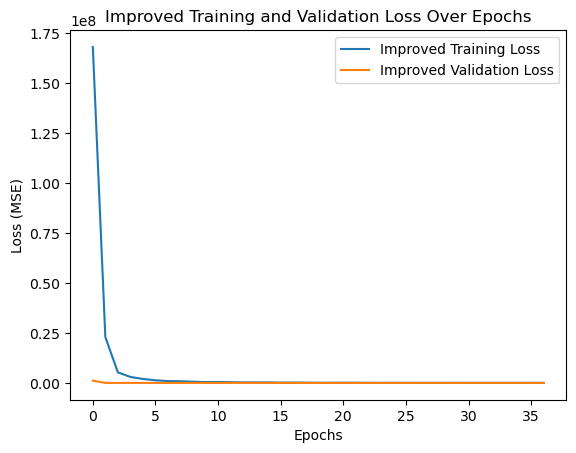

In [86]:
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Setting up early stopping AGAIN
early_stopping_improved = EarlyStopping(
    monitor='val_loss', 
    patience=5, 
    restore_best_weights=True
)

# Training the improved model
improved_history = improved_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping_improved],
    verbose=1
)

# Plotting the training history
plt.plot(improved_history.history['loss'], label='Improved Training Loss')
plt.plot(improved_history.history['val_loss'], label='Improved Validation Loss')
plt.title("Improved Training and Validation Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.show()

#### Better Model and What I Noticed
- After I changed my model to stop it from overfitting so much, this is what I did:

- Less Parameters: Now the model only has 1,025 trainable parameters, which is way less than before. That should help with overfitting FOR THE MODEL.

- Simpler Model: I made the model smaller by using fewer layers and fewer nodes, so it’s less likely to just memorize the training data.

- Dropout Layers: I kept using dropout layers, which randomly turn off about 30% of the neurons while training. This also helps avoid overfitting following his tutotial earlier.

#### What I Noticed During Training (New Model)
- Starting Loss: In the first epoch, the loss was still really high, but it dropped fast in the next few epochs. So the model is still learning basic patterns well now.

- Validation Loss: This time, the validation loss didn’t go up as quickly as before, but after a few epochs, it still started to increase. That means it’s still overfitting a bit, but maybe not as much.

- Training Time: It trained faster now, probably because it has fewer parameters and takes less time per epoch.

#### Looking at the Plots
- The loss (MSE) line starts low and goes up slowly. It’s not a huge jump, more of a steady rise. That shows the model is still overfitting, but it’s -learning a bit more smoothly.

- The epochs line (how training changes over time) starts at 0 and goes up fast, but this time it smooths out more as it gets closer to the end. That might mean the model is getting stable a bit faster.

## **Challenges with the Model**

### My Reflection on the Model Reset Problem (Keeping History Issue)

When I first trained my neural network model, I noticed something strange. The validation loss and MAE were not resetting between different training runs. The plots also didn’t look like I expected. At first, I didn’t understand why this was happening.

After checking many things, I found out that the model was keeping some "memory" from earlier runs. I didn’t see this problem in the beginning, so my results were not correct or consistent.

After trying different things, I finally found a solution. I needed to add K.clear_session() before creating the model. This command resets everything from the previous model, like weights and settings. After I did this, my model started from scratch each time, and the results became more reliable.

This was an important lesson for me. Now I understand that if I don’t reset the model, it will "remember" old training, and this gives wrong results. I will remember this for my future machine learning work.

### **Note:** 
***Please, try to run at least once if it fails. Restart again so the model resets...***

---

In [87]:
import os
print(os.getcwd())


C:\Users\STUDENT\Desktop\ML-CA2-50\ml-ca2-FranklinArruda


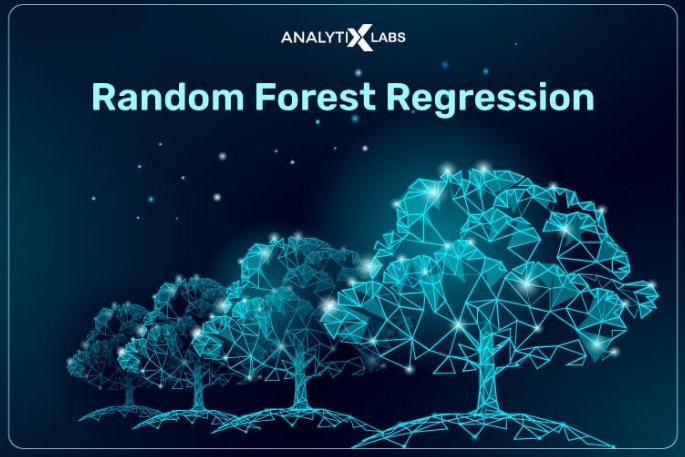

In [88]:
from IPython.display import Image, display

# Replace this path with the correct one for your setup
display(Image(filename="C:/Users/STUDENT/Desktop/random forest image.png", width=700))


### **6. Adding Random Forest for Comparison** 

***(As required by the assignment, I am also including a Random Forest model for comparison with my neural network.)***

In this part, I'm using a Random Forest Regressor to go along with my neural network model. I wanted to try a more classic machine learning model so I can compare the results, like the assignment asked.

I picked Random Forest because it’s a strong and flexible model for regression. It also works better with messy or noisy data compared to something simple like linear regression. Since this dataset has lots of different features, I thought it would be a good fit.

#### Link to My Feedback:
In my first assignment, I found it hard to manage model complexity and stop overfitting. I learned a lot from that and this time, I wanted to include a stronger model to compare with my neural network. This idea came from a Random Forest example we talked about in class and a tutorial I followed earlier. Also, I made sure to use clean data right from the start, unlike last time.


The idea for this came from what I did in my last assignment, where I also used a Random Forest model. I also checked the Scikit-Learn documentation to make sure I did the scaling properly this time (Accessed 17/05/2025).



### **6.1 Preparing the Data**

So, first off, I’m setting up the data here. I’m using the same split between training and testing as I did for the neural network just to keep everything consistent.

Like, getting the features (X) and the target (y) from the data. The features are all the columns except for the income, and the target is just the income column. This is what I want my model to learn to predict.

In [89]:
# Getting the features (X) and target (y) for the Random Forest model
X_rf = df.drop(columns=["Income(Thousands's)"])
y_rf = df["Income(Thousands's)"] 

### **6.2 Splittiing the Data**

Now, I’m splitting my data into training and testing sets. I’ll use 70% for training (to teach the model) and 30% for testing (to see how well the model learned). But this time I bit different
using variations like 70/30 instead of 80/20 all the time. I want to play with the training and maybe compare them... 

In [90]:
# Splitting the data into 70% training and 30% testing
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.3, random_state=42)

### **6.3 Scaling the Data**

Next, I’m scaling my data. This mean changing the range of all the features so they are between 0 and 1 etc...

This helps some machine learning models, like neural networks, learn faster and avoid getting stuck when running and learning. It’s not always needed for Random Forest, but it can still help for consistency.

In [91]:
# Scaling the data to a 0-1 range
scaler_rf = MinMaxScaler() 

### **6.4 Fitting and Transforming the Data**
Now, I fit the scaler to my training data (learn the min and max values), then I use this to transform both the training and testing data. 

That is important, I only fit on training data to avoid "data leakage" (when info from the test set influences the model during training).

In [92]:
# Fitting the scaler on the training data and transforming both sets
X_train_rf = scaler_rf.fit_transform(X_train_rf)
X_test_rf = scaler_rf.transform(X_test_rf)  

### **6.5 Converting Back to DataFrames**

After the scaling, the data becomes just an array without column names, so I convert it back to a DataFrame. This keeps the column names, which is helpful for debugging later.

In [93]:
# Converting back to DataFrame to keep the column names
X_train_rf = pd.DataFrame(X_train_rf, columns=X_rf.columns)
X_test_rf = pd.DataFrame(X_test_rf, columns=X_rf.columns)

### **6.6 Training the Model**

Now, it’s time to train my **Random Forest model**. This is a type of ensemble learning, which means it combines the results of many "decision trees" to make better predictions, hopefully... I’m using 100 trees here. A lot of tress by the way!

In [94]:
# Creating and training the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_rf, y_train_rf) 

RandomForestRegressor(random_state=42)

In my previous assignments, I always saw this mysterious **blue box** pop up when I ran my training models, but I never really paid much attention to it. In fact, I never bothered ata ll.

I just assumed it was some kind of friendly reminder from Python whatver.

But this time, I decided to actually dig into it, you know, like a proper data scientist in training.

So, after a bit of research, I found out that this blue box is actually a warning message. It’s Python’s way of saying, **“Hey, something’s a bit off here, but I’m gonna let it slide... for now.”**  Maybe an explotion as we used to say in class, but not now... Haha

### **6.7 Model Evaluation**
Here, I’m calculating three different metrics to check how well my model did:

Honestly, I didn’t really plan on doing it this way at first, but after reading that article by **Farshad K**, I realized that I could just adapt the same code he used for MAE and R². I pretty much just swapped out the variable names to match my dataset, changing **y_true** and **y_pred** to **y_test_rf** and **y_pred_rf**, and it worked, I think, as expected.

In [95]:
# Making predictions on the test set
y_pred_rf = rf_model.predict(X_test_rf)

# Evaluating the model
mse_rf = mean_squared_error(y_test_rf, y_pred_rf)
mae_rf = mean_absolute_error(y_test_rf, y_pred_rf)
r2_rf = r2_score(y_test_rf, y_pred_rf)

### **6.8 Printing The Result:**

In [96]:
print("Random Forest Results")
print("MSE:", mse_rf)
print("MAE:", mae_rf)
print("R2:", r2_rf)

Random Forest Results
MSE: 457.2452115166667
MAE: 15.553526666666667
R2: 0.7910825665986702


***I wasn’t totally sure if this would work the same way, but it seems to be giving me some numbers. Now, I just need to make sense of what these results actually mean and figure out if my model is doing a decent job.***


### **6.9 Checking the Columns**
Here I do a quick check to make sure that the training and testing datasets have the same features. This is important in the machine learning because because if the features (columns) don’t match my model, that could give weird results I dont even know.

In [97]:
print("Train Columns:", X_train_rf.columns, "\n")

print("---------------------------------------------------\n")

print("Test Columns:", X_test_rf.columns, "\n")

Train Columns: Index(['Age', 'Experience(Years)', 'Sort Code', 'Family', 'Credit Score',
       'Mortgage(Thousands's)', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online Banking', 'CreditCard', 'Education_Degree',
       'Education_Diploma', 'Education_Masters'],
      dtype='object') 

---------------------------------------------------

Test Columns: Index(['Age', 'Experience(Years)', 'Sort Code', 'Family', 'Credit Score',
       'Mortgage(Thousands's)', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online Banking', 'CreditCard', 'Education_Degree',
       'Education_Diploma', 'Education_Masters'],
      dtype='object') 



> ### **Understanding the Random Forest Results**

After I got these results earlier:

**MSE:** 457.2452115166667

**MAE:** 15.553526666666667

**R2:** 0.7910825665986702

I took a moment to really think about what they mean and went back to the same website where I had taken they from before. So, I found out that they’re common ways to measure how well my regression model is doing, each one showing a different part of the model’s performance like:

#### Mean Squared Error (MSE) - 457.25
MSE is a bit harsh to understand, and it really punishes big mistakes. It squares each error before averaging, so even a few large errors can push this number up a lot. My MSE of 457.25 means my predictions are quite a bit off on average, but without knowing more about my data, it’s hard to say exactly how bad this is...

#### Mean Absolute Error (MAE) - 15.55
MAE is a bit more nice. It just take the average of the absolute errors, like, without squaring them, so it’s easier to understand first. My MAE of 15.55 means what my predictions are, on average, about 15.55 thousand dollars off, a bit low than average. That number is usually easier to make sense of at this point.

#### R-squared (R²) Score - 0.79
Finally, there’s the (R²) score, which looks at the big picture as those two. But It tells me how much of the variation in my target variable (income) my model is explaining well. 
For exemple, with an R² of 0.79, my model is getting about 79% of the variation, which is a good start, but it also means there’s still 21% that it’s missing., and I am not sure how to fix that.

I found a really clear article that explains these metrics well, same were I took my code from: ***Essential Regression Evaluation Metrics:***  MSE, RMSE, MAE, R², and Adjusted R². 

It really helped me understand what these numbers mean, even though I dont fully understand them properly, but I believe I adapated well for this part. 



### **7. New Customer Income Prediction** 

- This part here it was one of the coolest part on this project because it really paid off all the work I had done previously.

- Like, it was asked to create a object list of Customers for prediction based on the model I trained whihc I chose ***Random Forest*** for this task.

- That was crucial for analysing the unseen data point out of the original I used. 

- So, the idea was to create a ***"new customer"*** with features similar to those in the training data, but completely separate from it, which really put my model to the test. Lasllty, as per requirement I am using the same strucutre of the original data but simulating the unseen data with some realistic data to find out how the trained model performs with this data it wasnt trained.

### **7.1 My new unseen data**

With random values to simulate them

In [98]:
### My new unseen data
new_customer = pd.DataFrame({
    'Age': [45],
    'Experience(Years)': [20],
    'Sort Code': [90089],
    'Family': [3],
    'Credit Score': [1.8],
    'Mortgage(Thousands\'s)': [0],
    'Personal Loan': [0],
    'Securities Account': [1],
    'CD Account': [0],
    'Online Banking': [1],
    'CreditCard': [0],
    'Education_Diploma': [1],
    'Education_Masters': [0],
    'Education_Degree': [0]
})

### **7.2 Using the same .columns FROM my original trained data for this new one**

By doing that I makde sure that the new_customer DataFrame has the same columns in the same order for my training data.

In [99]:
# column order matches the training data
new_customer = new_customer[X_rf.columns]

#### **7.3 Scaliing tHE New Customer**

wHY this part is important? Because, when I need to scale the data the same way I did for my training and testing sets done earlier.

That alone, maintain the consistency with training since the model was trained by scaling, and to provide a fair fight and comparison the same scale must be used to get accurate predictions using the same model.

In [100]:
# Scaling the new customer data
new_customer_scaled = pd.DataFrame(
    scaler_rf.transform(new_customer),
    columns=new_customer.columns
)

### **7.4 Predicting the Income**

Once the new customer data was scaled correclty, I did actualy the prediction on the income using the trained random forest model.

In [101]:
# Predicting the income
predicted_income = rf_model.predict(new_customer_scaled)

### **7.5 Printing Results**

In [102]:
print("\nIncome Prediction for the New Customer:")
print({predicted_income[0]})


Income Prediction for the New Customer:
{54.84}


###  Results Evaluation:

When I predicted the income for this new customer now, the model returned 54.84, which I believe it means that was the expected from this customer, because he/she might earn around 54,840 dollars per year. This prediction is based on my models understanding of the patterns in the original training data I did earlier, where it learned how features like age, and experience, and credit score relate to income etc.

I believe this result is a fair estimation because it is not extremely high or low, which means the model might be working fine from the training data. 

Therefore, my model can make reasonable income predictions for unseen data points using this new customer as sample, thanks to the large amount of learning it did during the initial training phase, not only that but following:


> **Quick Note:** I am not really sure which class, I believe the second or thhird, where lecturer explained how the MACHINE LEARNING models work, at the time I wasnt 100% sure, by by doing this project, I have taken a lot of hands on experience and it is fascinating how everything comes together, because the entire work was done only for this small part in the end, and the theoretical part was really the FOUNDATION for this Trained Model Machine learning. BIG THANKS for not only the explation, but how they are explained is what makes a difference.

I honestly, hate data science stuff, but I suprised myself with the results and now, even though I continue studying programming, I keep this Science thing in the background because when we do the work, we can see what we are capable. 

***Which brings me to the next part of this assignment: Part 2: (Sentiment Analysis)***

---


# References

### Class Materials 

### Official Documentation 
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html
Accessed 10/05/2025

- https://stackoverflow.com/questions/37292872/how-can-i-one-hot-encode-in-python
Accessed 13/05/2025

- https://datagy.io/pandas-get-dummies/
Accessed 13/05/2025


- https://medium.com/@thakurviku2003/why-is-the-random-state-42-in-machine-learning-the-answer-is-more-fun-than-you-think-964b0cc61199
Accessed 16/05/2025


- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
Accessed 16/05/2025


- https://www.ibm.com/think/topics/overfitting#:~:text=In%20machine%20learning%2C%20overfitting%20occurs,of%20the%20machine%20learning%20model.
Accessed 16/05/2025 

- https://www.tensorflow.org/guide/keras/sequential_model
Accessed 17/05/2025

- https://keras.io/guides/sequential_model/
Accessed 17/05/2025

- https://keras.io/api/callbacks/early_stopping/
Accessed 17/05/2025


- https://medium.com/%40piyushkashyap045/early-stopping-in-deep-learning-a-simple-guide-to-prevent-overfitting-1073f56b493e
Accessed 17/05/2025


- https://keras.io/api/models/model_training_apis/
Accessed 17/05/2025


- https://stackoverflow.com/questions/41908379/keras-plot-training-validation-and-test-set-accuracy
Accessed 17/05/2025

- https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/
Accessed 17/05/2025


- Scikit-Learn Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
Accessed 17/05/2025


- https://www.datacamp.com/tutorial/random-forests-classifier-python
Accessed 19/05/2025